In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#Drive'dan csv dosyasını çekme işlemi
downloaded = drive.CreateFile({'id':"1XQ2B1NXmUoUStyK76pWP-iOwZbz3XiuM"}) 
downloaded.GetContentFile('housing.csv') 

In [5]:
#csv dosyasını okuyup dataframe'e ekleme işlemi
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
df = pd.read_csv('housing.csv',header=None, delimiter=r"\s+", names=column_names)


In [6]:
#csv dosyasında null değer olup olmadığını kontrol etme işlemi
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [19]:
# Veri setinin ilk 5 değeri
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
cr = df.corr()

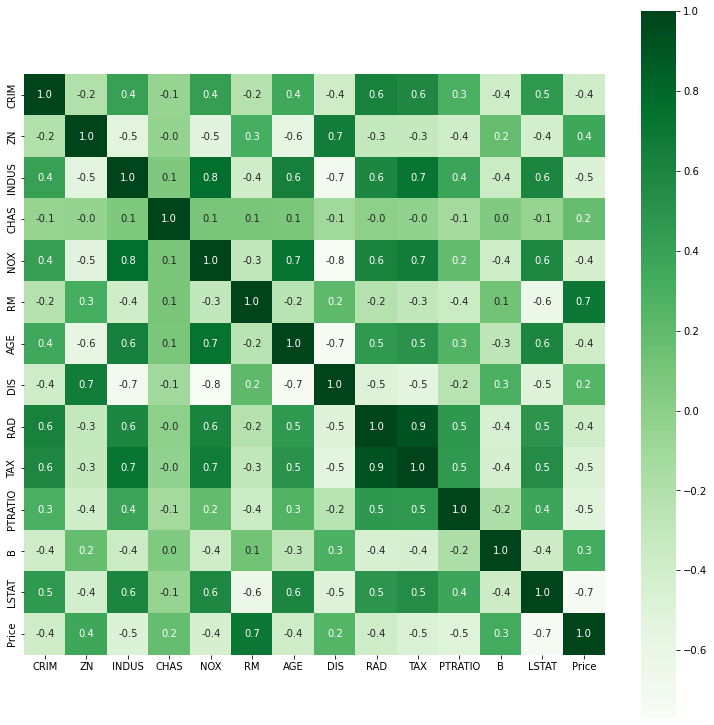

In [21]:
# Verilerin arasındaki korelasyonu anlamak için bunu matplotlib.pyplot ve seaborn kütüphanesi ile tabloda çizdirme işlemi
plt.figure(figsize=(13,13))
sns.heatmap(cr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [7]:
# Veri setindeki fiyatı etkileyecek değişkenleri x'e fiyatı Y'ye atama işlemi(x=fiyatı belirleyen değişkenler, y ise fiyattır)
X = df.drop(['Price'], axis=1)
#X = df[['RM', 'LSTAT']]
Y = df['Price']

In [118]:
# Veri setini train ve test olarak ikiye ayırma işlemi()      testsize=0.09, randomstat=3       t=0.4,r=1    t=0.25,r=2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=2)

In [119]:
# Modeli Linear Regression olarak belirleme işlemi(Multiple Linear Regression)
#model_MLR = LinearRegression()
model_lr = LinearRegression()

In [120]:
# Modeli Training etme işlemi
model_lr.fit(X_train, Y_train)

LinearRegression()

In [135]:
# Test verilerini doğru tahmin etme yüzdesi
Y_predicted = model_lr.predict(X_test)
math.sqrt(metrics.r2_score(Y_test,Y_predicted))

0.8662052975183907

In [134]:
# Training verilerini doğru tahmin etme yüzdesi
Yt_predicted = model_lr.predict(X_train)
math.sqrt(metrics.r2_score(Y_train,Yt_predicted))
#math.sqrt(model_lr.score(X_train,Y_train))

0.856809223596952

In [151]:
#test verisinin hata değerleri
print("mean absolute error = "+str(metrics.mean_absolute_error(Y_test,Y_predicted)))
print("mean squared error = "+str(metrics.mean_squared_error(Y_test,Y_predicted)))
print("root mean squared error = "+str(metrics.mean_squared_error(Y_test,Y_predicted,squared=False)))
print("mean_absolute_percentage_error = %"+str(metrics.mean_absolute_percentage_error(Y_test,Y_predicted)*100))

mean absolute error = 3.2416565967950386
mean squared error = 22.160198304875475
root mean squared error = 4.707461981245889
mean_absolute_percentage_error = %16.52690159550284


In [149]:
#train verisinin hata değerleri
print("mean absolute error = "+str(metrics.mean_absolute_error(Y_train,Yt_predicted)))
print("mean squared error = "+str(metrics.mean_squared_error(Y_train,Yt_predicted)))
print("root mean squared error = "+str(metrics.mean_squared_error(Y_train,Yt_predicted,squared=False)))
print("mean_absolute_percentage_error = %"+str(metrics.mean_absolute_percentage_error(Y_train,Yt_predicted)*100))

mean absolute error = 3.3437270857227275
mean squared error = 22.040524695395952
root mean squared error = 4.694733719328068
mean_absolute_percentage_error = %16.679192359308036


In [125]:
# Manuel olarak tüm x değerleri girildiğinde tahmin sonucu veren kod parçacığı
model_lr.predict([[0.02729, 0.00, 7.070, 0, 0.4690, 7.1850, 61.10, 4.9671, 2, 242.0, 17.80, 392.83, 4.03]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([30.7458304])

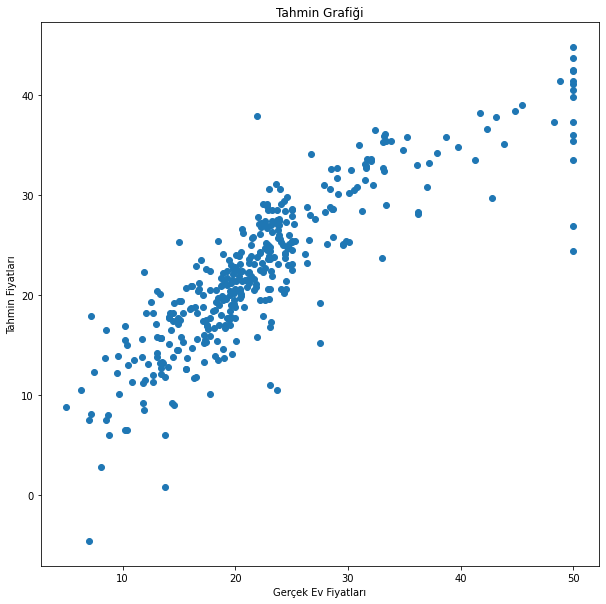

In [128]:
# train verisi için
plt.figure(figsize=(10,10))
plt.scatter(Y_train, Yt_predicted)
plt.title("Tahmin Grafiği")
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Fiyatları")
plt.show()

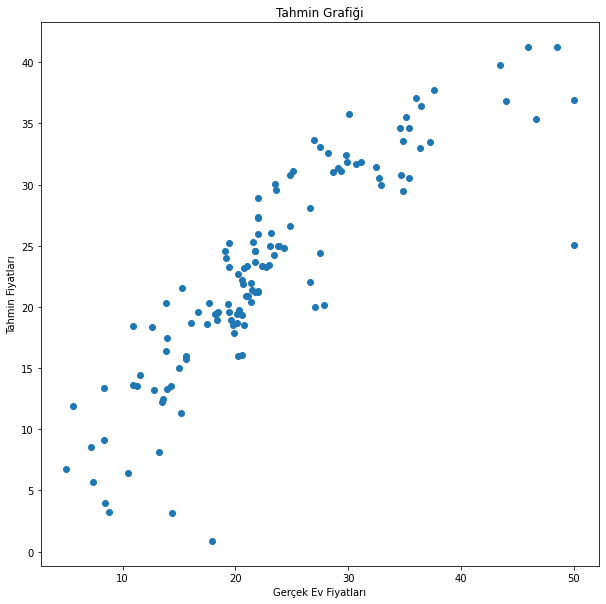

In [131]:
#test verisi için
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_predicted)
plt.title("Tahmin Grafiği")
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Fiyatları")
plt.show()

In [37]:
model_lr.score(X_test,Y_test)

0.7503116174489237